In [1]:
from shapely.geometry import Point

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

%matplotlib inline

In [2]:
insurance_cov = pd.read_csv('../data/2015-2020_ACS_Insurance.csv', encoding='cp1252')

acs_2019 = acs_2019[acs_2019.columns.drop(list(acs_2019.filter(regex='#N/A')))]

In [3]:
insurance_cov

,county,Year,Total population,Total population - Male,Total population - Female,"Total population - Hispanic or Latino, White",Total population - Black or African American,Total population - American Indian & Alaska Native,Total population - Asian,Total population - Native Hawaiian & Other Pacific Islander,...,Percent of Uninsured population - (American Indian and Alaska Native),Percent of Uninsured population - (Asian),Percent of Uninsured population - (Native Hawaiian and Other Pacific Islander),"Percent of Uninsured population - (HISPANIC OR LATINO, (Some other race alone)","Percent of Uninsured population - (HISPANIC OR LATINO, (Two or more races)","Percent of Uninsured population - (HISPANIC OR LATINO, (of any race)",Percent of Uninsured population - (White),GEOID,state,county.1
0,Meigs County,2020,"12,129","5,982","6,147","11,536",224,45,33,-,...,0.0,0.0,-666666666.0,0.0,0.0,15.8,11.3,0500000US47121,47,121
1,Montgomery County,2020,"191,007","90,431","100,576","131,487","37,619",878,"4,744",605,...,6.4,8.6,6.6,19.2,8.9,13.8,6.8,0500000US47125,47,125
2,Moore County,2020,"6,302","3,105","3,197","5,890",91,72,184,1,...,0.0,0.0,0.0,-666666666.0,0.0,-666666666.0,8.4,0500000US47127,47,127
3,Obion County,2020,"29,900","14,372","15,528","25,021","3,322",72,120,5,...,2.8,27.5,0.0,45.1,14.5,24.4,8.1,0500000US47131,47,131
4,Overton County,2020,"21,876","10,700","11,176","21,214",71,24,70,139,...,0.0,0.0,0.0,100.0,7.4,0.0,9.0,0500000US47133,47,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,Bledsoe County,2015,"12,463",920,"6,505","5,958","11,848",220,22,24,...,0.0,0.0,0.0,-666666666.0,25.0,3.2,63.1,0500000US47007,47,7
566,Campbell County,2015,"39,650","2,997","19,273","20,377","38,836",173,130,114,...,0.0,0.0,0.0,-666666666.0,0.0,15.2,21.1,0500000US47013,47,13
567,Cannon County,2015,"13,619","1,049","6,706","6,913","13,009",184,42,63,...,11.4,0.0,57.1,-666666666.0,32.9,16.6,28.7,0500000US47015,47,15
568,Houston County,2015,"8,097",543,"4,007","4,090","7,638",211,39,15,...,34.6,0.0,0.0,-666666666.0,100.0,2.9,18.6,0500000US47083,47,83


In [4]:
acs_census = pd.read_csv('../data/acs-2015-2020.csv', encoding='cp1252')

In [5]:
acs_census

,county,Year,EMPLOYMENT STATS - Ages 16 yrs+,EMPLOYMENT STATS - Ages 16 yrs+ - In labor force,EMPLOYMENTSTATS - Ages 16 yrs+ - In labor force,EMPLOYMENTSTATS - Ages 16 yrs+ - In labor force(Civilian),EMPLOYMENTSTATS - Ages 16 yrs+ - In labor force(Civilian),EMPLOYMENTSTATS - Ages 16 yrs+ - Employed_In labor force(Civilian),EMPLOYMENTSTATS - Ages 16 yrs+ - Employed_In labor force(Civilian),EMPLOYMENT STATS - Ages 16 yrs+ -Unemployed- In labor force(Civilian),...,HEALTH INSURANCE COVERAGE - Unemployed (With private insurance coverage) Ages 19 to 64 years- In labor force,HEALTH INSURANCE COVERAGE - Unemployed(With public insurance coverage) Ages 19 to 64 years-In labor force,HEALTH INSURANCE COVERAGE - Unemployed(With public insurance coverage) Ages 19 to 64 years-In labor force,HEALTH INSURANCE COVERAGE - Unemployed(No health insurance coverage) Ages 19 to 64 years -In labor force,HEALTH INSURANCE COVERAGE - Unemployed(No health insurance coverage) Ages 19 to 64 years -In labor force,HEALTH INSURANCE COVERAGE - Not in labor force(No health insurance coverage) Ages 19 to 64 years,HEALTH INSURANCE COVERAGE - Not in labor force(No health insurance coverage) Ages 19 to 64 years,GEOID,State,County_Num
0,Meigs County,2020,"10,036","5,162",51.4,"5,162",51.4,"4,702",46.9,460,...,34.0,142,35.8,120,30.2,366,16.3,0500000US47121,47.0,121.0
1,Montgomery County,2020,"155,404","103,722",66.7,"91,222",58.7,"85,780",55.2,"5,442",...,49.8,"1,350",27.7,"1,396",28.6,"2,847",9.6,0500000US47125,47.0,125.0
2,Moore County,2020,"5,321","2,931",55.1,"2,902",54.5,"2,789",52.4,113,...,49.0,18,17.3,35,33.7,138,12.4,0500000US47127,47.0,127.0
3,Obion County,2020,"24,444","13,483",55.2,"13,440",55.0,"12,613",51.6,827,...,26.8,183,24.6,362,48.6,792,16.6,0500000US47131,47.0,131.0
4,Overton County,2020,"17,912","9,898",55.3,"9,897",55.3,"9,545",53.3,352,...,24.3,108,39.7,106,39.0,406,12.4,0500000US47133,47.0,133.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,Bledsoe County,2015,"11,365","5,252",46.2,"5,240",46.1,"4,739",41.7,501,...,39.7,95,19.9,193,40.4,827,31.2,0500000US47007,47.0,7.0
566,Campbell County,2015,"33,014","15,456",46.8,"15,429",46.7,"13,897",42.1,"1,532",...,15.5,390,26.6,852,58.0,"1,997",21.0,0500000US47013,47.0,13.0
567,Cannon County,2015,"11,168","6,578",58.9,"6,572",58.8,"5,724",51.3,848,...,24.2,233,29.8,394,50.4,376,17.0,0500000US47015,47.0,15.0
568,Houston County,2015,"6,578","3,262",49.6,"3,262",49.6,"2,997",45.6,265,...,42.6,66,27.0,74,30.3,325,18.9,0500000US47083,47.0,83.0


In [6]:
counties = gpd.read_file('../data/TN_counties.geojson')

In [7]:
counties.head()

,OBJECTID,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,...,INTPTLAT,INTPTLON,Region,District,Grand,Commission,FarmBureau,Shape__Area,Shape__Length,geometry
0,1,47,065,01639749,47065,Hamilton,Hamilton County,06,H1,G4020,...,+35.1607616,-085.1977114,3,32,East,4,3,1.605505e+10,650912.052240,"POLYGON ((-85.29255 35.26292, -85.29239 35.263..."
1,2,47,115,01639770,47115,Marion,Marion County,06,H1,G4020,...,+35.1334215,-085.6183990,3,32,East,4,3,1.428144e+10,528655.888705,"POLYGON ((-85.54388 35.30238, -85.54187 35.301..."
2,3,47,185,01639800,47185,White,White County,06,H1,G4020,...,+35.9270486,-085.4557854,3,31,Middle,3,4,1.057666e+10,603207.582494,"MULTIPOLYGON (((-85.27432 35.78444, -85.27432 ..."
3,4,47,129,01639778,47129,Morgan,Morgan County,06,H1,G4020,...,+36.1386970,-084.6392616,3,31,East,2,4,1.456528e+10,623544.645736,"POLYGON ((-84.79101 36.05854, -84.79185 36.059..."
4,5,47,013,01639728,47013,Campbell,Campbell County,06,H1,G4020,...,+36.4015922,-084.1592495,4,41,East,2,5,1.388656e+10,668417.596960,"POLYGON ((-84.32222 36.39287, -84.32249 36.393..."


In [8]:
counties = counties[['GEOID','NAMELSAD','geometry']]

In [16]:
counties.rename(columns={'NAMELSAD': 'county'})

,GEOID,county,geometry
0,47065,Hamilton County,"POLYGON ((-85.29255 35.26292, -85.29239 35.263..."
1,47115,Marion County,"POLYGON ((-85.54388 35.30238, -85.54187 35.301..."
2,47185,White County,"MULTIPOLYGON (((-85.27432 35.78444, -85.27432 ..."
3,47129,Morgan County,"POLYGON ((-84.79101 36.05854, -84.79185 36.059..."
4,47013,Campbell County,"POLYGON ((-84.32222 36.39287, -84.32249 36.393..."
...,...,...,...
90,47039,Decatur County,"POLYGON ((-88.18739 35.66371, -88.18738 35.663..."
91,47119,Maury County,"POLYGON ((-87.31715 35.55287, -87.31705 35.553..."
92,47047,Fayette County,"POLYGON ((-89.63774 35.17934, -89.63768 35.181..."
93,47063,Hamblen County,"POLYGON ((-83.38984 36.26275, -83.38940 36.263..."


In [18]:
counties = counties.rename(columns={'NAMELSAD': 'county'})

In [19]:
counties

,GEOID,county,geometry
0,47065,Hamilton County,"POLYGON ((-85.29255 35.26292, -85.29239 35.263..."
1,47115,Marion County,"POLYGON ((-85.54388 35.30238, -85.54187 35.301..."
2,47185,White County,"MULTIPOLYGON (((-85.27432 35.78444, -85.27432 ..."
3,47129,Morgan County,"POLYGON ((-84.79101 36.05854, -84.79185 36.059..."
4,47013,Campbell County,"POLYGON ((-84.32222 36.39287, -84.32249 36.393..."
...,...,...,...
90,47039,Decatur County,"POLYGON ((-88.18739 35.66371, -88.18738 35.663..."
91,47119,Maury County,"POLYGON ((-87.31715 35.55287, -87.31705 35.553..."
92,47047,Fayette County,"POLYGON ((-89.63774 35.17934, -89.63768 35.181..."
93,47063,Hamblen County,"POLYGON ((-83.38984 36.26275, -83.38940 36.263..."


<AxesSubplot:>

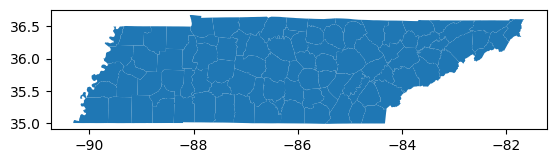

In [28]:
counties.plot()

now merging Insurance CSV file with the TN Counties Json file. 

In [32]:
insurance_counties = pd.merge(insurance_cov, counties, how='left',  on = ['county', 'GEOID'])

In [33]:
insurance_counties.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 570 entries, 0 to 569
Data columns (total 68 columns):
 #   Column                                                                               Non-Null Count  Dtype   
---  ------                                                                               --------------  -----   
 0   county                                                                               570 non-null    object  
 1   Year                                                                                 570 non-null    int64   
 2    Total population                                                                    570 non-null    object  
 3    Total population - Male                                                             570 non-null    object  
 4   Total population - Female                                                            570 non-null    object  
 5   Total population - Hispanic or Latino, White                                         

insurance_counties = gpd.sjoin(counties, insurance_cov, op = 'within')

AttributeError: 'Line2D' object has no property 'coloumn'

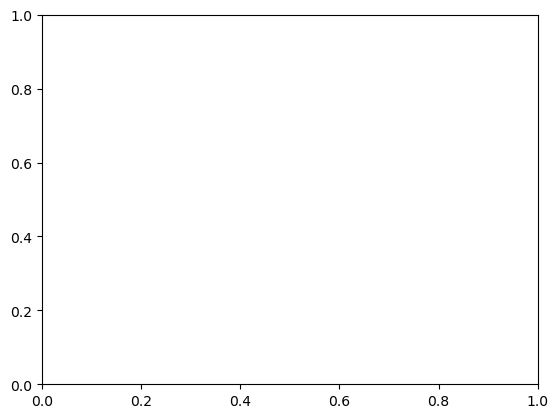

In [35]:
insurance_counties.plot(coloumn = 'Percent of Uninsured population - (Female)')